In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import torch
import nltk

from nltk.stem.porter import PorterStemmer
ps=PorterStemmer()

from nltk.corpus import stopwords
# stopwords.words("english")

from sklearn.preprocessing import LabelEncoder
import seaborn as sns

import string
# string.punctuation

from collections import Counter 


# Data Cleaning

In [2]:
df = pd.read_csv("./spam.csv", encoding='latin-1')

In [3]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [4]:
df.drop(columns=["Unnamed: 2","Unnamed: 3","Unnamed: 4"],axis=1,inplace=True)

In [5]:
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [6]:
df.rename(columns={"v2":"statements"},inplace=True)
df.rename(columns={"v1":"target"},inplace=True)

In [7]:
df.head()

,target,statements
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [8]:
encoder = LabelEncoder()
df["target"]= encoder.fit_transform(df["target"])

In [9]:
df.head()

,target,statements
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [10]:
df["num_of_chars"]=df["statements"].apply(len)

In [11]:
df.head()

,target,statements,num_of_chars
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [12]:
df["num_of_words"]=df["statements"].apply(lambda x: len(nltk.word_tokenize(x)))

In [13]:
df.head()

,target,statements,num_of_chars,num_of_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [14]:
df["num_of_sentences"]=df["statements"].apply(lambda x: len(nltk.sent_tokenize(x)))   # this will break into long sentences 

In [15]:
df.head()

,target,statements,num_of_chars,num_of_words,num_of_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


**now we will create a diagram and visualize that out of the 3 new col created which is the most efficent to to choosen**

# EDA exploratory data analysis

In [16]:
df["target"].value_counts()  #this counts number o ham and spams

target
0    4825
1     747
Name: count, dtype: int64

<Axes: xlabel='num_of_chars', ylabel='Count'>

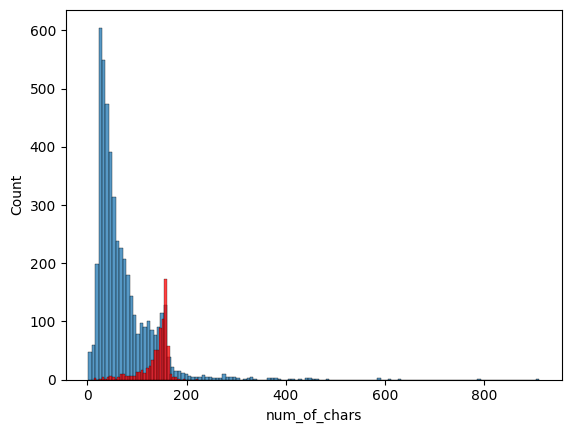

In [17]:
sns.histplot(df[df["target"] == 0 ]["num_of_chars"])
sns.histplot(df[df["target"] ==1 ]["num_of_chars"],color="red")


# from diagram we see that there are very less num of chars in the messages which are spam . 

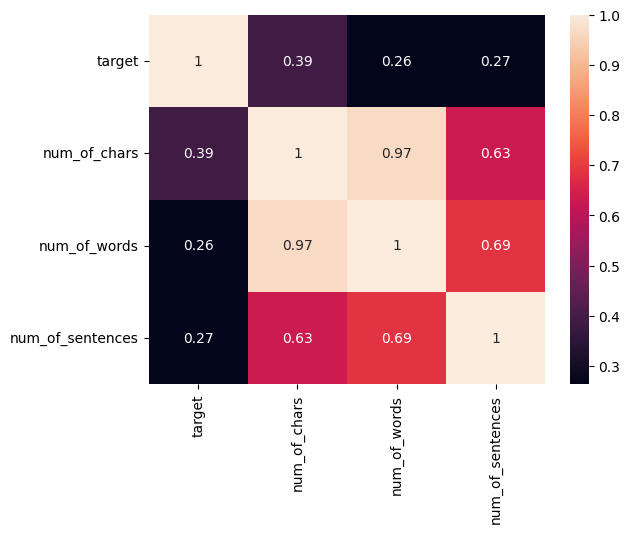

In [18]:
# annot=>annotation , corr=>correlation

numeric_df = df.select_dtypes(include=['number'])   # only numeric columns
sns.heatmap(numeric_df.corr(), annot=True)
plt.show()

# Data PreProcessing

In [19]:
def transform_text(statements):
    statements = statements.lower()
    statements = nltk.word_tokenize(statements)

    y=[]
    for i in statements:
        if i.isalnum():
            y.append(i)

    statements = y[:]
    y.clear()

    for i in statements:
        if i not in stopwords.words("english") and i not in string.punctuation:
            y.append(i)

    statements = y[:]
    y.clear()

    for i in statements:
        y.append(ps.stem(i))
    return " ".join(y) 

In [20]:
transform_text("I LovE running from the top <and i will WIn,suresh kumar is a looser")

'love run top win suresh kumar looser'

In [21]:
df["transformed_text"] = df["statements"].apply(transform_text)

In [22]:
df.head()

,target,statements,num_of_chars,num_of_words,num_of_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


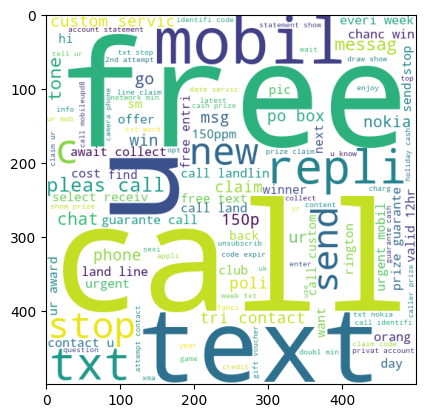

In [23]:
from wordcloud import WordCloud
wc = WordCloud(width=500,height=500,min_font_size=10,background_color="white")

# .str.cat(sep=" "))  => string.concatenate (join together) .sep means seperator using space
spam_wc = wc.generate(df[df["target"] == 1]["transformed_text"].str.cat(sep=" "))  
plt.imshow(spam_wc)  # image for spam texts 

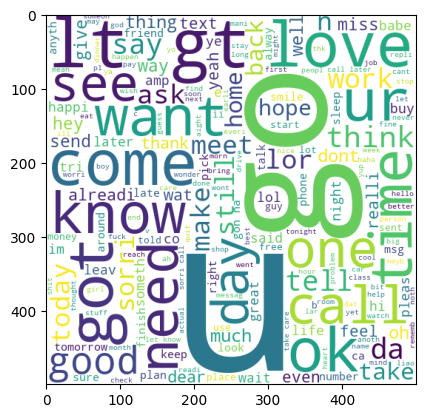

In [24]:
ham_wc = wc.generate(df[df["target"] == 0]["transformed_text"].str.cat(sep=" "))  
plt.imshow(ham_wc) # text for real messages

In [25]:
spam_corpus=[]
for msg in df[df["target"] ==1]["transformed_text"]:
    for word in msg.split():
        spam_corpus.append(word)

In [26]:
len(spam_corpus)

11490

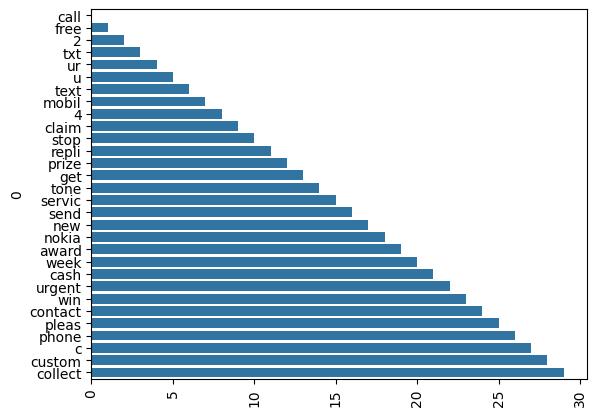

In [27]:
sns.barplot(pd.DataFrame(Counter(spam_corpus).most_common(30))[0])
# this gives us the count of the most repeated words in it 

plt.xticks(rotation='vertical')
plt.show()

In [28]:
ham_corpus=[]
for msg in df[df["target"] ==0]["transformed_text"]:
    for word in msg.split():
        ham_corpus.append(word)

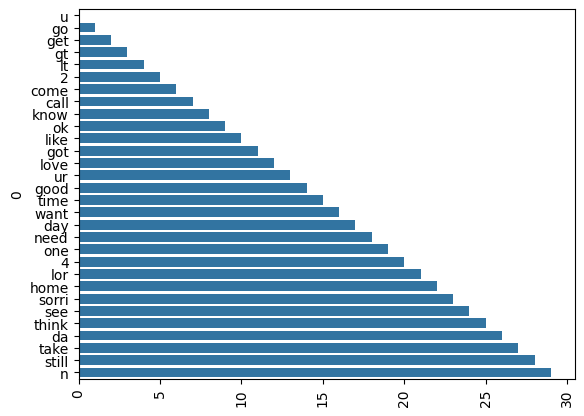

In [29]:
sns.barplot(pd.DataFrame(Counter(ham_corpus).most_common(30))[0])
plt.xticks(rotation='vertical')
plt.show()

# Model Building

In [30]:
# Naive baise is the best for text type of data

In [31]:
# this method is of baggage of wrods ... weher most common words are taken into picture . other method is Tf-IDF

from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features = 3000)

In [32]:
X = cv.fit_transform(df["transformed_text"]).toarray()

In [33]:
y = df["target"].values

In [34]:
X,y

(array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], shape=(5572, 3000)),
 array([0, 0, 1, ..., 0, 0, 0], shape=(5572,)))

In [35]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

**Naive Bayes mthod**

In [36]:
# most commonly used NB's ... we will try all of them to see which one gives the best results
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB   
from sklearn.metrics import accuracy_score , precision_score , confusion_matrix

In [37]:
gnb = GaussianNB()
gnb.fit(X_train,y_train)
y_pred1 = gnb.predict(X_test)
acc = accuracy_score(y_test,y_pred1)
pre = precision_score(y_test,y_pred1)
conf = confusion_matrix(y_test,y_pred1)
acc,pre,conf

(0.8556053811659193,
 0.48056537102473496,
 array([[818, 147],
        [ 14, 136]]))

In [38]:
mnb = MultinomialNB()
mnb.fit(X_train,y_train)
y_pred2 = mnb.predict(X_test)
acc = accuracy_score(y_test,y_pred2)
pre = precision_score(y_test,y_pred2)
conf = confusion_matrix(y_test,y_pred2)
acc,pre,conf

(0.97847533632287,
 0.9256756756756757,
 array([[954,  11],
        [ 13, 137]]))

In [39]:
bnb = BernoulliNB()
bnb.fit(X_test,y_test)
y_pred3 = bnb.predict(X_test)
acc = accuracy_score(y_test,y_pred3)
pre = precision_score(y_test,y_pred3)
conf = confusion_matrix(y_test,y_pred3)
acc,pre,conf

(0.95695067264574,
 0.9903846153846154,
 array([[964,   1],
        [ 47, 103]]))

**Tf-IDF method**

In [40]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer()
from sklearn.naive_bayes import GaussianNB,BernoulliNB,MultinomialNB
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score

In [41]:
Xt = tfidf.fit_transform(df["transformed_text"]).toarray()
yt = df["target"].values
Xt,yt

(array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]], shape=(5572, 6708)),
 array([0, 0, 1, ..., 0, 0, 0], shape=(5572,)))

In [42]:
from sklearn.model_selection import train_test_split
Xt_train,Xt_test,yt_train,yt_test = train_test_split(Xt,yt,test_size = 0.2,random_state=42)

In [43]:
GNB = GaussianNB()
GNB.fit(Xt_train,yt_train)
y_pred4 = GNB.predict(Xt_test)
acc = accuracy_score(yt_test,y_pred4)
pre = precision_score(yt_test,y_pred4)
conf = confusion_matrix(yt_test,y_pred4)
acc,pre,conf

(0.8600896860986547,
 0.4889705882352941,
 array([[826, 139],
        [ 17, 133]]))

In [44]:
BNB = BernoulliNB()
BNB.fit(Xt_train,yt_train)
y_pred6 = BNB.predict(Xt_test)
acc = accuracy_score(yt_test,y_pred6)
pre = precision_score(yt_test,y_pred6)
conf = confusion_matrix(yt_test,y_pred6)
acc,pre,conf

(0.967713004484305,
 0.9672131147540983,
 array([[961,   4],
        [ 32, 118]]))

In [45]:
MNB = MultinomialNB()
MNB.fit(Xt_train,yt_train)
y_pred5 = MNB.predict(Xt_test)
acc = accuracy_score(yt_test,y_pred5)
pre = precision_score(yt_test,y_pred5)
conf = confusion_matrix(yt_test,y_pred5)
acc,pre,conf

(0.9632286995515695,
 1.0,
 array([[965,   0],
        [ 41, 109]]))

**from both Tf-IDF and Bagging techniqe we can conclude that the best output which we can get for our results will be ***MultinomialNB using Tf-IDF*** for Best results**

In [46]:
tfidfMAX = TfidfVectorizer(max_features=3000)

Xm = tfidfMAX.fit_transform(df["transformed_text"]).toarray()
ym = df["target"].values
Xm,ym


Xm_train,Xm_test,ym_train,ym_test = train_test_split(Xm,ym,test_size=0.2,random_state=42)

MNB = MultinomialNB()
MNB.fit(Xm_train,ym_train)
y_pred5 = MNB.predict(Xm_test)
acc = accuracy_score(ym_test,y_pred5)
pre = precision_score(ym_test,y_pred5)
conf = confusion_matrix(ym_test,y_pred5)
acc,pre,conf


(0.9775784753363229,
 1.0,
 array([[965,   0],
        [ 25, 125]]))

**before using max_features =3000 use were getting slighltly less accuray  ... hence we used max_features to get a better accuary thenn before .
*Note:* max_features is applied on tfidf Muntinomial only not on others**

# Improving Models Performance

In [47]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [48]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb = XGBClassifier(n_estimators=50,random_state=2)

In [49]:
# these are all the classifiers as mentioned above stored in a dict 

clfs = {
    'SVC' : svc,
    'KN' : knc, 
    'NB': mnb, 
    'DT': dtc, 
    'LR': lrc, 
    'RF': rfc, 
    'AdaBoost': abc
    # 'BgC': bc, 
    # 'ETC': etc,
    # 'GBDT':gbdt,
    # 'xgb':xgb
}

we just have tested only 2 types of classification for out text there are many others ways also, to let us know which can be more reliable we will run a loop through all the types and will create a table to compare whose accuracy and prescision is more ... one with best results will be used for training


In [50]:
def model_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred7 = clf.predict(X_test)
    acc = accuracy_score(y_test,y_pred7)
    pre = precision_score(y_test,y_pred7)

    return acc , pre

In [51]:
# just checking if the funcition is working properly or no
model_classifier(xgb,X_train,y_train,X_test,y_test)   

(0.9721973094170404, 0.9917355371900827)

In [52]:
accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():
    
    current_accuracy,current_precision = model_classifier(clf, X_train,y_train,X_test,y_test)
    
    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For  SVC
Accuracy -  0.9130044843049328
Precision -  0.6754966887417219
For  KN
Accuracy -  0.9219730941704036
Precision -  1.0
For  NB
Accuracy -  0.97847533632287
Precision -  0.9256756756756757
For  DT
Accuracy -  0.9273542600896861
Precision -  0.9859154929577465
For  LR
Accuracy -  0.97847533632287
Precision -  0.9846153846153847
For  RF
Accuracy -  0.9766816143497757
Precision -  1.0
For  AdaBoost
Accuracy -  0.9264573991031391
Precision -  0.9473684210526315


In [53]:
performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Precision',ascending=False)


In [54]:
performance_df 

,Algorithm,Accuracy,Precision
1,KN,0.921973,1.000000
5,RF,0.976682,1.000000
3,DT,0.927354,0.985915
4,LR,0.978475,0.984615
6,AdaBoost,0.926457,0.947368
2,NB,0.978475,0.925676
0,SVC,0.913004,0.675497


**There are ways with which i can use different classifer as 1... Like voting & Stacking**

In [55]:
# Voting

svc = SVC(kernel='sigmoid', gamma=1.0,probability=True)
mnb = MultinomialNB()
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)

from sklearn.ensemble import VotingClassifier
voting = VotingClassifier(estimators=[('svm', svc), ('nb', mnb), ('et', etc)],voting='soft')

voting.fit(X_train,y_train)



,estimators,"[('svm', ...), ('nb', ...), ...]"
,voting,'soft'
,weights,None
,n_jobs,None
,flatten_transform,True
,verbose,False
,C,1.0
,kernel,'sigmoid'
,degree,3
,gamma,1.0
,coef0,0.0


In [56]:
y_pred = voting.predict(X_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))

Accuracy 0.9811659192825112
Precision 0.9777777777777777


In [57]:
# stacking

estimators=[('svm', svc), ('nb', mnb), ('et', etc)]
final_estimator=RandomForestClassifier()

from sklearn.ensemble import StackingClassifier

clf = StackingClassifier(estimators=estimators, final_estimator=final_estimator)

clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))


Accuracy 0.9838565022421525
Precision 0.9852941176470589


Why do we need .pkl files?

    Reuse without retraining

    Training a model (or fitting a vectorizer) takes time and resources.

    Once trained, you "freeze" them into .pkl files. Next time, you just load them and use them directly.

Deployment

    Suppose you are building a spam classifier web app.
    
    Your web app can simply load model.pkl + vectorizer.pkl and immediately start predicting.
    
    No need to retrain the model every time the app restarts.

In [58]:
import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))